<a href="https://colab.research.google.com/github/varadhodiyil/neural-machine-translation/blob/master/NLP_Assign2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Machine Translation - Assignment 2

In this task, you will develop a neural machine translation (NMT) system to translate text from one language into another. For this, you will need to choose the data to train the models, perform data processing and train a sequence2sequence neural model.


## Section 1- Data Collection and Preprocessing 


---


**Task 1  (5 marks)**

---

There are few datasets to train an NMT system available from Tatoeba Project (http://www.manythings.org/anki/) or OPUS project (http://opus.nlpl.eu/).

*  Download a language pair (preferably European language) and **extract** the file(s) and upload it to CoLab
*  Create a list of lines by splitting the text file at every occurrence accordingly, i.e. source and target language and remove copyright information
*  Print number of sentences
*  Limit the number of sentences to 10,000 lines (but more than 5,000 lines)
*  Split the data into train and test [You can split validation set here or while training use Keras validation_split option]
*  Print 100th sentence in original script[ not unicode] for source and target language

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%cd /content/drive/My\ Drive/NLP/

/content/drive/My Drive/NLP


In [0]:
#Using Spanish- English

# !wget http://www.manythings.org/anki/spa-eng.zip

In [0]:
import os, sys , re , unicodedata
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
NUM_SENTENCES = 10000
NUM_WORDS = 10000

In [0]:
lines = open('spa.txt', encoding="utf-8").readlines()

In [0]:
source_sentences = []
target_sentences = []
output_sentences_inputs = []

# print(len(lines))
count = 0
for line in lines:

    if count > NUM_SENTENCES-1:
        break

    if '\t' not in line:
        continue

    input_sentence, output , _ = line.rstrip().split('\t')
    if input_sentence in source_sentences:
        continue
    output_sentence = output + ' <eos>'
    output_sentence_input = '<bof> ' + output

    source_sentences.append(input_sentence)
    target_sentences.append(output_sentence)
    output_sentences_inputs.append(output_sentence_input)
    count += 1


In [0]:
print(len(source_sentences))
print(source_sentences[100] , target_sentences[100])

10000
I'm old. Soy viejo. <eos>


**Task 2 (5 marks)** 

---

* Add '<bof\>' to denote beginning of sentence and '<eos\>' to denote the end of the sentence to each target line.
* Preprocess (word tokenisation, lowercasing) the text.

In [0]:
def unicode_to_ascii(s):
  s =  ''.join(c for c in unicodedata.normalize('NFD', s)
      if unicodedata.category(c) != 'Mn')
  s = re.sub(r"[^a-zA-Z?¿<>']+", " ", s)
  s = re.sub(r"'",'',s)
  s = s.lower()
  return s

def preprocess(w):
    w = unicode_to_ascii(w)
    w = w.strip().rstrip()
    w = re.sub(r"([?.!,])", r"", w)
    w = re.sub(r'[" "]+', " ", w)
    return w

In [0]:
source_sentences = [preprocess(w) for w in source_sentences]
target_sentences = [preprocess(w) for w in target_sentences]
output_sentences_inputs =[preprocess(w) for w in output_sentences_inputs]

In [0]:
print(source_sentences[0], target_sentences[0])

go ve <eos>


In [0]:
# input_sentences[100:200]

In [0]:
print(preprocess("¿Qué? isn't él"))

¿que isnt el


In [0]:
input_tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=NUM_WORDS)
input_tokenizer.fit_on_texts(source_sentences)
input_integer_seq = input_tokenizer.texts_to_sequences(source_sentences)

Source_vocabulary = input_tokenizer.word_index
num_source_tokens = len(Source_vocabulary)

max_source_seq_length = max(len(sen) for sen in input_integer_seq)

In [0]:
output_tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=NUM_WORDS, filters='')
output_tokenizer.fit_on_texts(target_sentences + output_sentences_inputs)
output_integer_seq = output_tokenizer.texts_to_sequences(target_sentences)
output_input_integer_seq = output_tokenizer.texts_to_sequences(output_sentences_inputs)

target_vocabulary = output_tokenizer.word_index
num_target_tokens = len(target_vocabulary)

num_words_output = len(target_vocabulary) + 1
max_target_seq_length = max(len(sen) for sen in output_integer_seq)

In [0]:
encoder_input_sequences = tf.keras.preprocessing.sequence.pad_sequences(input_integer_seq, maxlen=max_source_seq_length)
decoder_input_sequences = tf.keras.preprocessing.sequence.pad_sequences(output_input_integer_seq, maxlen=max_target_seq_length, padding='post')
decoder_output_sequences = tf.keras.preprocessing.sequence.pad_sequences(output_integer_seq, maxlen=max_target_seq_length, padding='post')

In [0]:
print('Number of samples:', len(source_sentences))
print('Number of unique source language tokens:', num_source_tokens)
print('Number of unique target language tokens:', num_target_tokens)
print('Max sequence length of source language:', max_source_seq_length)
print('Max sequence length of target language:', max_target_seq_length)
print("Source Vocabulary",list(Source_vocabulary.keys()))
print("Target Vocabulary",list(target_vocabulary.keys()))

Number of samples: 10000
Number of unique source language tokens: 2927
Number of unique target language tokens: 4722
Max sequence length of source language: 5
Max sequence length of target language: 10
Source Vocabulary ['i', 'tom', 'is', 'you', 'a', 'it', 'he', 'im', 'me', 'the', 'this', 'its', 'we', 'my', 'was', 'do', 'to', 'are', 'that', 'go', 'can', 'dont', 'she', 'they', 'not', 'like', 'were', 'have', 'here', 'in', 'be', 'on', 'youre', 'him', 'your', 'up', 'did', 'thats', 'come', 'what', 'ill', 'need', 'know', 'mary', 'love', 'want', 'hes', 'now', 'no', 'who', 'am', 'toms', 'lets', 'cant', 'get', 'help', 'see', 'got', 'well', 'let', 'please', 'stop', 'out', 'has', 'look', 'at', 'theyre', 'how', 'all', 'us', 'very', 'home', 'too', 'her', 'one', 'there', 'so', 'will', 'good', 'hate', 'just', 'give', 'an', 'for', 'saw', 'car', 'dog', 'try', 'isnt', 'must', 'feel', 'work', 'back', 'his', 'happy', 'eat', 'why', 'may', 'likes', 'keep', 'take', 'leave', 'wait', 'didnt', 'stay', 'with', '

In [0]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train, Y_test = train_test_split(encoder_input_sequences, decoder_input_sequences , test_size=0.2)

**Task 3 (5 marks)** 

---

---

*  Assign each unique word an integer value (5 marks).
*  Create word embedding for your vocabulary using pre-trained Glove embeddings (10 marks) (http://nlp.stanford.edu/data/glove.6B.zip)
* Print the first line of the embeddings (see below) 

In [0]:
s_word_dict = {}
for i,w in enumerate(Source_vocabulary):
    s_word_dict[w] = i

In [0]:
t_word_dict = {}
for i,w in enumerate(target_vocabulary):
    t_word_dict[w] = i

In [0]:
print(s_word_dict)
print(t_word_dict)

{'i': 0, 'tom': 1, 'is': 2, 'you': 3, 'a': 4, 'it': 5, 'he': 6, 'im': 7, 'me': 8, 'the': 9, 'this': 10, 'its': 11, 'we': 12, 'my': 13, 'was': 14, 'do': 15, 'to': 16, 'are': 17, 'that': 18, 'go': 19, 'can': 20, 'dont': 21, 'she': 22, 'they': 23, 'not': 24, 'like': 25, 'were': 26, 'have': 27, 'here': 28, 'in': 29, 'be': 30, 'on': 31, 'youre': 32, 'him': 33, 'your': 34, 'up': 35, 'did': 36, 'thats': 37, 'come': 38, 'what': 39, 'ill': 40, 'need': 41, 'know': 42, 'mary': 43, 'love': 44, 'want': 45, 'hes': 46, 'now': 47, 'no': 48, 'who': 49, 'am': 50, 'toms': 51, 'lets': 52, 'cant': 53, 'get': 54, 'help': 55, 'see': 56, 'got': 57, 'well': 58, 'let': 59, 'please': 60, 'stop': 61, 'out': 62, 'has': 63, 'look': 64, 'at': 65, 'theyre': 66, 'how': 67, 'all': 68, 'us': 69, 'very': 70, 'home': 71, 'too': 72, 'her': 73, 'one': 74, 'there': 75, 'so': 76, 'will': 77, 'good': 78, 'hate': 79, 'just': 80, 'give': 81, 'an': 82, 'for': 83, 'saw': 84, 'car': 85, 'dog': 86, 'try': 87, 'isnt': 88, 'must': 89,

In [0]:
# !wget nlp.stanford.edu/data/glove.6B.zip

In [0]:
# !unzip glove.6B.zip

In [0]:
#Example from keras.io

embeddings_dict = {}
with open("glove.6B.50d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [0]:
#Example from keras.io
num_words = min(NUM_WORDS, len(Source_vocabulary) + 1)
embedding_matrix = np.zeros((num_words, 50))
for word, index in Source_vocabulary.items():
    embedding_vector = embeddings_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [0]:
print(embeddings_dict[list(embeddings_dict.keys())[0]])

[ 4.1800e-01  2.4968e-01 -4.1242e-01  1.2170e-01  3.4527e-01 -4.4457e-02
 -4.9688e-01 -1.7862e-01 -6.6023e-04 -6.5660e-01  2.7843e-01 -1.4767e-01
 -5.5677e-01  1.4658e-01 -9.5095e-03  1.1658e-02  1.0204e-01 -1.2792e-01
 -8.4430e-01 -1.2181e-01 -1.6801e-02 -3.3279e-01 -1.5520e-01 -2.3131e-01
 -1.9181e-01 -1.8823e+00 -7.6746e-01  9.9051e-02 -4.2125e-01 -1.9526e-01
  4.0071e+00 -1.8594e-01 -5.2287e-01 -3.1681e-01  5.9213e-04  7.4449e-03
  1.7778e-01 -1.5897e-01  1.2041e-02 -5.4223e-02 -2.9871e-01 -1.5749e-01
 -3.4758e-01 -4.5637e-02 -4.4251e-01  1.8785e-01  2.7849e-03 -1.8411e-01
 -1.1514e-01 -7.8581e-01]


## Section 2 Translation Model training



---



**Task 4 (15 marks)**
* Provide code for the encoder using Keras LSTM (5 marks)
* Provide code for the decoder using Keras LSTM (5 marks)
* Train the sequence2sequence (encoder-decoder) model (5 marks) 


In [0]:
embedding_layer = tf.keras.layers.Embedding(num_words, 50, weights=[embedding_matrix], input_length=max_source_seq_length)

In [0]:
decoder_targets_one_hot = np.zeros((
        len(source_sentences),
        max_target_seq_length,
        num_words_output
    ),
    dtype='float32'
)

In [0]:
# decoder_targets_one_hot = None
# model = None
# del decoder_targets_one_hot
# del model
# # del encoder_states
# # del decoder_dense
# import gc
# gc.collect()

In [0]:
decoder_targets_one_hot.shape

(10000, 10, 4723)

In [0]:
for i, d in enumerate(decoder_output_sequences):
    for t, word in enumerate(d):
        decoder_targets_one_hot[i, t, word] = 1

In [0]:
encoder_placeholder = tf.keras.layers.Input(shape=(max_source_seq_length,),name='encoder_layer')
layer_inp = embedding_layer(encoder_placeholder)
encoder = tf.keras.layers.LSTM(256, return_state=True)

encoder_outputs, h, c = encoder(layer_inp)
encoder_states = [h, c]

In [0]:
# decoder code goes here

decoder_placeholder = tf.keras.layers.Input(shape=(max_target_seq_length,),name='decoder_layer')

decoder_embedding_layer = tf.keras.layers.Embedding(num_words_output, 256 )
decoder_inp = decoder_embedding_layer(decoder_placeholder)


decoder_lstm = tf.keras.layers.LSTM(256, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inp, initial_state=encoder_states)

In [0]:
decoder_dense = tf.keras.layers.Dense(num_words_output, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [0]:
model =  tf.keras.models.Model([encoder_placeholder,decoder_placeholder], decoder_outputs)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_layer (InputLayer)      [(None, 5)]          0                                            
__________________________________________________________________________________________________
decoder_layer (InputLayer)      [(None, 10)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 5, 50)        146400      encoder_layer[0][0]              
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 10, 256)      1209088     decoder_layer[0][0]              
______________________________________________________________________________________________

In [0]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [0]:
r = model.fit(
    [encoder_input_sequences, decoder_input_sequences],
    decoder_targets_one_hot,
    batch_size=128,
    epochs=25,
    # initial_epochs=25,
    validation_split=0.1,
)  
model.save('seq2seq_source_target.h5')

Epoch 1/25
71/71 [==============================] - 4s 55ms/step - loss: 2.6368 - accuracy: 0.6420 - val_loss: 2.5133 - val_accuracy: 0.6679
Epoch 2/25
71/71 [==============================] - 3s 45ms/step - loss: 1.9529 - accuracy: 0.7185 - val_loss: 2.2895 - val_accuracy: 0.6865
Epoch 3/25
71/71 [==============================] - 3s 44ms/step - loss: 1.7547 - accuracy: 0.7359 - val_loss: 2.1367 - val_accuracy: 0.7049
Epoch 4/25
71/71 [==============================] - 3s 45ms/step - loss: 1.6050 - accuracy: 0.7506 - val_loss: 2.0530 - val_accuracy: 0.7155
Epoch 5/25
71/71 [==============================] - 3s 44ms/step - loss: 1.4837 - accuracy: 0.7631 - val_loss: 1.9649 - val_accuracy: 0.7247
Epoch 6/25
71/71 [==============================] - 3s 44ms/step - loss: 1.3806 - accuracy: 0.7748 - val_loss: 1.9104 - val_accuracy: 0.7295
Epoch 7/25
71/71 [==============================] - 3s 44ms/step - loss: 1.2944 - accuracy: 0.7843 - val_loss: 1.8801 - val_accuracy: 0.7389
Epoch 8/25
71

## Section 3 Testing

---

**Task 5 (20 marks)**

* Use the trained model to translate the text from the source into the target language (10 marks). 
* Use the test/evaluation set (see Section 1) and perform an automatic evaluation with the BLEU metric (10 marks). 
You can use the NLTK library to calculate BLEU.

In [0]:
encoder_model = tf.keras.models.Model(encoder_placeholder, encoder_states)

In [0]:
decoder_h = tf.keras.layers.Input(shape=(256,))
decoder_c = tf.keras.layers.Input(shape=(256,))
decoder_states_inputs = [decoder_h, decoder_c]

In [0]:
decoder_inputs_single = tf.keras.layers.Input(shape=(1,))
decoder_inputs_single_x = decoder_embedding_layer(decoder_inputs_single)

In [0]:
decoder_outputs, h, c = decoder_lstm(decoder_inputs_single_x, initial_state=decoder_states_inputs)

In [0]:
decoder_states = [h, c]
decoder_outputs = decoder_dense(decoder_outputs)

In [0]:
decoder_model = tf.keras.models.Model(
    [decoder_inputs_single] + decoder_states_inputs,
    [decoder_outputs] + decoder_states
)

In [0]:
idx2word_input = {v:k for k, v in Source_vocabulary.items()}
idx2word_target = {v:k for k, v in target_vocabulary.items()}

In [0]:
def translate(sequence):
    states_value = encoder_model.predict(sequence)
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = target_vocabulary['<bof>']
    eos = target_vocabulary['<eos>']
    output_sentence = []

    for _ in range(max_target_seq_length):
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)
        idx = np.argmax(output_tokens[0, 0, :])

        if eos == idx:
            break

        word = ''

        if idx > 0:
            word = idx2word_target[idx]
            output_sentence.append(word)

        target_seq[0, 0] = idx
        states_value = [h, c]

    return ' '.join(output_sentence)

In [0]:
# i = np.random.choice(len(source_sentences))
i  = 7926
input_seq = encoder_input_sequences[i:i+1]
translation = translate(input_seq)
print( source_sentences[i])
print( translation)

i feel so lonely
me siento tan tan mal


In [0]:
reference = target_sentences[i].split()
hypothesis = translation.split()
reference = reference[:-1]
print(reference,hypothesis)

['me', 'siento', 'tan', 'sola'] ['me', 'siento', 'tan', 'tan', 'mal']


In [0]:
import nltk
from nltk.translate.bleu_score import SmoothingFunction
smoothing = SmoothingFunction().method4

In [0]:
def get_bleu(reference,hyp):
    try:
        return nltk.translate.bleu_score.sentence_bleu([reference], hyp,smoothing_function = smoothing,weights=(0.35,0.35,0.20,0.10))
    except:
        print("Zero" , reference ,hyp)
        return 0


In [0]:
get_bleu(reference,hypothesis)

0.43952917693277554

In [0]:
_inp = encoder_input_sequences.tolist()

In [0]:
X_test = X_test[:200]

In [0]:
bleu_scores = list()

In [0]:
for _i,x in enumerate(X_test):
    # print(_i)
    idx = _inp.index(x.tolist())
    # print(input_sentences[idx],output_sentences[idx] )
    seq = encoder_input_sequences[idx:idx+1] 
    # print(seq)
    # print(seq)
    translation = translate(seq)
    # print('-')
    
    reference = target_sentences[idx].split()
    hypothesis = translation.split()
    
    reference = reference[:-1]
    _score = get_bleu(reference,hypothesis)
    bleu_scores.append( _score )
    # print(_i , _score)

Zero ['fuego'] ['fuego']
Zero ['gracias'] ['gracias']
Zero ['dejalo'] ['dejalo']


In [0]:
_bleu_scores = np.array(bleu_scores)
print("Avg Score: "  ,_bleu_scores.mean() )

Avg Score:  0.4369088722478014


# Section 4 Attention

---



In [0]:
tf.keras.backend.clear_session()
# del model
import gc
gc.collect()

41509

**Task 5 (40 Marks)** Sequence2Sequence

* Extend the existing Seq2Seq model with an attention mechanism [Discussed in Class]
* Create sequence2sequence model with attention (15 marks)
* Train the model with the same data from Section 1 (10 marks)
* Translate the evaluation set using the sequence2sequence attention model (10 marks)
* Evaluate the translations made with the sequence2sequence attention model and compare it with the model without attention using BLEU (5 marks)

In [0]:
#example from tensorfow.org

embedding_size = 50
enc_input = tf.keras.layers.Input(shape=(max_source_seq_length,))
encoder = tf.keras.layers.Embedding(num_words, embedding_size, weights= [embedding_matrix], trainable=False)(enc_input)
encoder = tf.keras.layers.LSTM(256, return_sequences=True, unroll=True )(encoder)
encoder_last_layer = encoder[:,-1,:]

In [0]:
dec_inp = tf.keras.layers.Input(shape=(max_target_seq_length,))
decoder = tf.keras.layers.Embedding(num_words_output, embedding_size)(dec_inp)
decoder = tf.keras.layers.LSTM(256, return_sequences=True, unroll=True)(decoder, initial_state=[encoder_last_layer,encoder_last_layer])

In [0]:
attention = tf.keras.layers.dot([decoder, encoder], axes=[2, 2])
attention = tf.keras.layers.Activation('softmax', name='attention')(attention)

context = tf.keras.layers.dot([attention, encoder], axes=[2,1])

decoder_combined_context = tf.keras.layers.concatenate([context, decoder])

output = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(64, activation="tanh"))(decoder_combined_context)
output = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(num_words_output, activation="softmax"))(output)

In [0]:
model = tf.keras.models.Model(inputs =[enc_input, dec_inp], outputs =[output])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 5, 50)        146400      input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 5, 256)       314368      embedding[0][0]                  
______________________________________________________________________________________________

In [0]:
model.fit(
    [encoder_input_sequences, decoder_input_sequences],
    decoder_targets_one_hot,
    batch_size=256,
    epochs=25,
    #initial_epochs=15,
    validation_split=0.1
)  
model.save('seq2seq_source_target_attention.h5')

Epoch 1/25
36/36 [==============================] - 2s 62ms/step - loss: 5.4128 - acc: 0.5825 - val_loss: 4.0106 - val_acc: 0.5486
Epoch 2/25
36/36 [==============================] - 2s 52ms/step - loss: 3.1344 - acc: 0.5993 - val_loss: 3.0672 - val_acc: 0.5486
Epoch 3/25
36/36 [==============================] - 2s 52ms/step - loss: 2.5240 - acc: 0.5993 - val_loss: 2.7931 - val_acc: 0.5486
Epoch 4/25
36/36 [==============================] - 2s 52ms/step - loss: 2.2617 - acc: 0.6497 - val_loss: 2.5609 - val_acc: 0.6436
Epoch 5/25
36/36 [==============================] - 2s 52ms/step - loss: 2.0736 - acc: 0.6995 - val_loss: 2.4886 - val_acc: 0.6511
Epoch 6/25
36/36 [==============================] - 2s 51ms/step - loss: 1.9618 - acc: 0.7149 - val_loss: 2.3871 - val_acc: 0.6808
Epoch 7/25
36/36 [==============================] - 2s 52ms/step - loss: 1.8926 - acc: 0.7220 - val_loss: 2.3380 - val_acc: 0.6825
Epoch 8/25
36/36 [==============================] - 2s 51ms/step - loss: 1.8268 - a

In [0]:
def translate_attention(seq):
    decoder_input = np.ones(shape=(seq.shape[0], max_target_seq_length))
    # decoder_input = np.ones(shape=(seq.shape[0], max_target_seq_length))
    decoder_input[:,0] = target_vocabulary['<bof>']
    for i in range(1, max_target_seq_length):
        output_ = model.predict([seq , decoder_input]).argmax(axis=2)
        decoder_input[:,i] = output_[:,i]
    decoder_output = decoder_input[:,1:]
    # print(decoder_input)
    decoder_output = np.array(decoder_output,dtype=int)
    sequence = decoder_output[0]
    text = ''
    for i in sequence:
        if i == 0:
            continue
        if idx2word_target[i] == '<eos>':
            break
        else:
            text += ' ' + idx2word_target[i]
    return text.strip().rstrip()

In [0]:
# print(encode(input_seq))
i = 0
input_seq = encoder_input_sequences[i:i+1] 

trans = translate_attention(input_seq)
print(trans)
print(target_sentences[i], source_sentences[i])
reference = target_sentences[i]
reference = reference[:-1]
print(get_bleu(trans , reference))


ve <eos> go
0


In [0]:
bleu_scores_att = list()

In [0]:
for _i,x in enumerate(X_test):
    idx = _inp.index(x.tolist())

    seq = encoder_input_sequences[idx:idx+1]
    translation = translate_attention(seq)
    # print('-')
    reference = target_sentences[idx].split()
    hypothesis = translation.split()
    reference = reference[:-1]
    _score = get_bleu(reference,hypothesis)
 
    bleu_scores_att.append( _score )


In [0]:
_bleu_scores_att = np.array(bleu_scores_att)
print("Avg after Attention : ", _bleu_scores_att.mean() )

Avg after Attention :  0.04200939572714086


In [0]:
import matplotlib.pyplot as plot

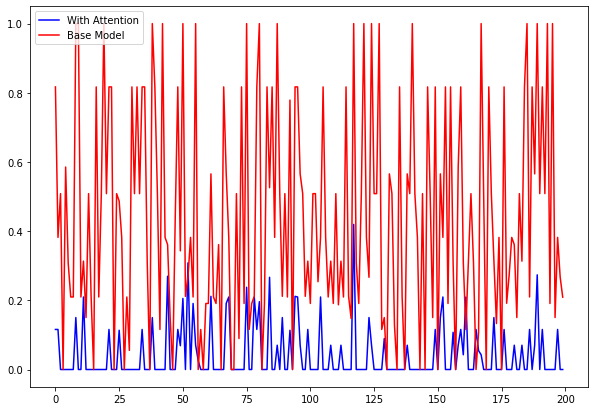

In [0]:
f, ax = plot.subplots(figsize=(10, 7))
ax.plot(_bleu_scores_att,color='blue',label='With Attention' )
ax.plot(_bleu_scores, color='red' , label='Base Model')
ax.legend()

# ***References***


1.   http://keras.io
2.   https://www.tensorflow.org/tutorials/text/nmt_with_attention


